
# TME 2 : Fourier transform

This course is dedicated to the study of the discrete Fourier transform applied on the two following images:

<div>
    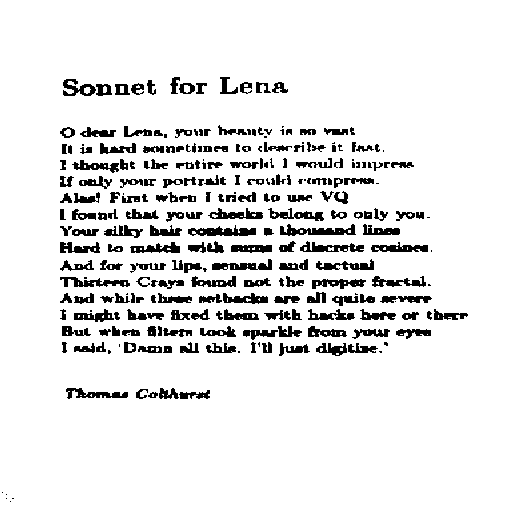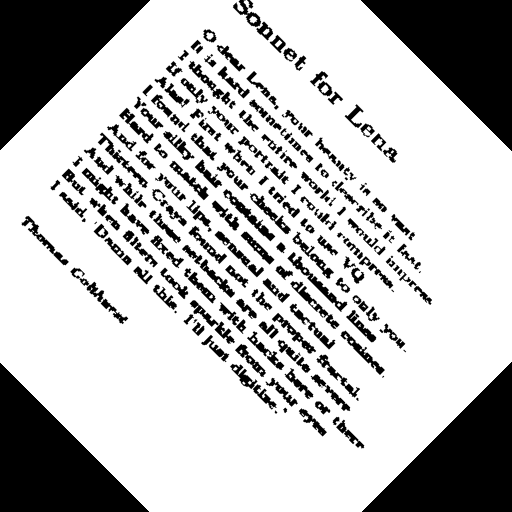
</div>

and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.gif'))
sonrot = np.array(Image.open('img/sonrot.gif'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [2]:
def computeFT(I):
    return np.fft.fft2(I)
def toVisualizeFT(If):
    return np.abs(np.fft.fftshift(If))
def toVisualizeLogFT(If):
    return np.log(1+np.abs(np.fft.fftshift(If)))

#fonction de seuillage
#sur la TF, elle améliore la visibilité des axes majeurs
def thresholdImage(I,s):
    T = np.copy(I)
    T = np.where(T>=s,255,0)
    return T

#fonction d'affichage des spectres et des fichiers
def showIma(I):
    plt.figure()
    plt.gray()
    plt.imshow(I)
    plt.show()

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

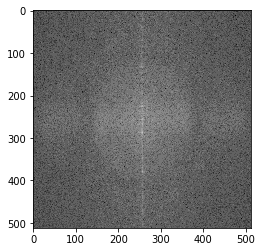

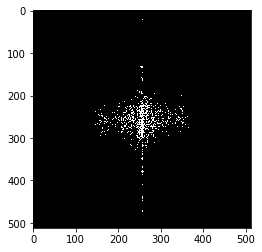

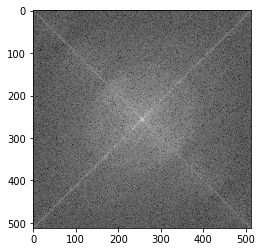

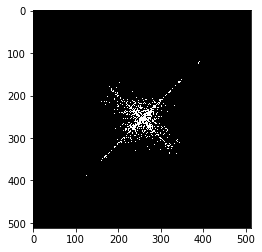

In [9]:
import matplotlib.pyplot as plt

#transformée de Fourier du sonnet
sonf = computeFT(son)

#échelle logarithmique
sonflog = toVisualizeLogFT(sonf)
sonflog = sonflog.astype(int)
showIma(sonflog)

#transformée de Fourier seuillée
sonf = toVisualizeFT(sonf)
sonf = sonf.astype(int)
sonft = thresholdImage(sonf,1E5)
showIma(sonft)

#transformée de Fourier du sonnet retourné
#échelle logarithmique
sonrotf = computeFT(sonrot)
sonrotflog = toVisualizeLogFT(sonrotf)
sonrotflog = sonrotflog.astype(int)
showIma(sonrotflog)

#transformée seuillée
sonrotf = toVisualizeFT(sonrotf)
sonrotf = sonrotf.astype(int)
sonrotft = thresholdImage(sonrotf,1E5)
showIma(sonrotft)

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

The Fourier transform rotates as the image does. The rotation angle is preserved, and the direction is the same.

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [4]:
def blend(I1,I2,alpha):
    return alpha*I1 + (1-alpha)*I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

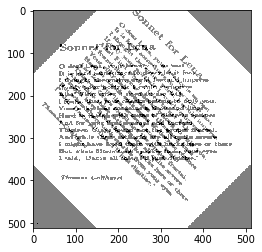

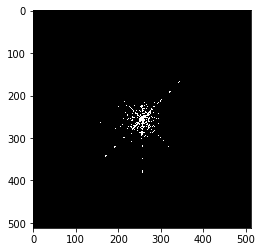

In [5]:
#additivité
sonb = blend(son,sonrot,0.5)
showIma(sonb)

#transformée de Fourier seuillée
sonbf = computeFT(sonb)
sonbf = toVisualizeFT(sonbf)
sonbf = sonbf.astype(int)
sonbft = thresholdImage(sonbf,1E5)
showIma(sonbft)

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

The new image is a linear combination from two source files, F = G + H, with a simple weight vector ($\alpha$,(1-$\alpha$)).
Hence, the new Fourier transform is also a linear combination from both source transforms: FT(F) = $\alpha$FT(G) + (1-$\alpha$)FT(H). The spectrum displayed is its module, so the same rule applies: the initial spectres are summed out.

The $\alpha$ coefficient determines how "visible" the components are:
- when $\alpha$ equals 1, the sonnet is shown in its original shape, as the rotated component is zero-ed out.
- when $\alpha$ equals 0, the sonnet is shown just as sonrot displays it (with a 45' rotation) for the same reason.
- when $\alpha$ equals 0.5, we get the perfect blend, with both images weighing the exact same on the result.

(useless) addenda:
1, 0.5, 0 are the values that the (1-$\alpha$) part explicitly suggests to try. Note that $\alpha$ can also cover a broader range.
For instance, when $\alpha$ grows beyond 1, the rotated image reveals again upon the original one with its colours inverted. The higher the $\alpha$, the clearer it gets (black-er blacks, whit-er whites). As $\alpha$ reaches 130, the image's initial palette is recovered and the cycle starts again. The components of the linear combination periodically reveal and disappear depending on $\alpha$'s values. 
There is a symmetrical phenomenon when $\alpha$ shrinks below -1.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [6]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T
    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1
    #Dans la transformée, chaque fréquence représente une orientation dans le plan
    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    return np.array(Image.fromarray(I).rotate(a, expand=True))

def rectifyOrientation(I):
    Ift = computeFT(I)
    Ift = toVisualizeFT(Ift)
    Ift = thresholdImage(Ift,3E5)
    Iori, degree = mainOrientation(Ift)
    print("Computed angle:",degree)
    return rotateImage(I,-degree)

8. Experiment `rectifyOrientation()` on `sonrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

In [7]:
def testRotation(I,d):
    Ir = rotateImage(I,d)
    print("Effective rotation:",d)
    Ir = rectifyOrientation(Ir)
    showIma(Ir)

Computed angle: -45.0


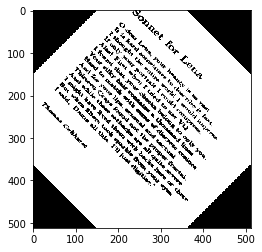

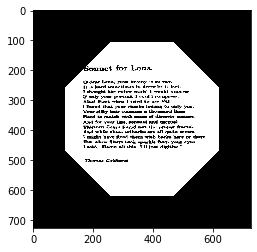

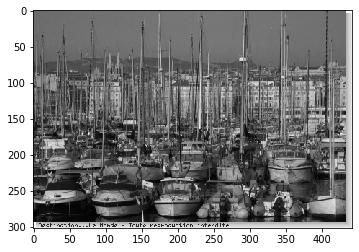

Effective rotation: 20
Computed angle: 22.5


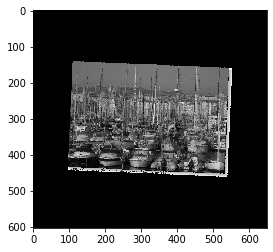

Effective rotation: 4
Computed angle: 5.625


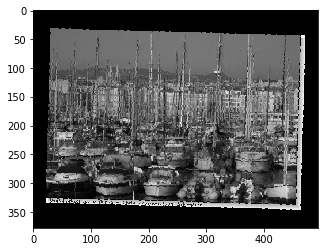

Effective rotation: 220
Computed angle: 39.375


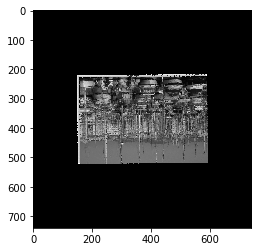

Effective rotation: 76
Computed angle: 67.5


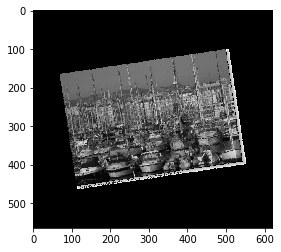

In [8]:
#afficher le sonnet droit
flashback = rectifyOrientation(sonrot)
showIma(sonrot)
showIma(flashback)

#tests de rotation
port = np.array(Image.open('img/port.jpg'))
showIma(port)

testRotation(port,20)
testRotation(port,4)
testRotation(port,220)
testRotation(port,76)

#En plus de la marge d'erreur, on notera que le programme a un peu de mal à différencier le haut du bas. 
#S'il ne compte que sur l'orientation des lignes de force, qui ont donc deux directions, c'est tout à fait normal.